<a href="https://colab.research.google.com/github/Somcodo4/rul-prediction-of-lithium-ion-batteries/blob/main/Linear_Regression_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
PREDICTION OF RUL OF LITHIUM BATTERY
USING LINEAR REGRESSION MODEL
"""

# Importing necessary libraries
import numpy as np
import joblib
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import time

In [ ]:
# Load dataset from CSV file
df=pd.read_csv('Battery_RUL II.csv')

In [ ]:
df.head()

,Cycle_Index,Discharge_Time,Decrement,Max_Voltage_Discharge,Min_Voltage_Charge,Time,Time_constant_current,Charging_time,RUL
0,1,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,5,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


In [ ]:
# Split features (X) and target variable (y)
X = df.drop(columns=['RUL'])
y = df['RUL']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
linear_preds = linear_model.predict(X_test)


# Make predictions on training and test data
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

In [ ]:
# Training time calculation
start_time = time.time()
linear_model.fit(X_train, y_train)
training_time = time.time() - start_time

# Prediction time calculation
start_time = time.time()
random_forest_preds = linear_model.predict(X_test)
prediction_time = time.time() - start_time

In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, linear_preds)
mae = mean_absolute_error(y_test, linear_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, linear_preds)

In [ ]:
# Print evaluation metrics
print("Evaluation Metrics for Linear Regression:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(f"Training Time: {training_time} seconds")
print(f"Prediction Time: {prediction_time} seconds")

Evaluation Metrics for Linear Regression:
MSE: 54.54310491948241
MAE: 4.644128441792308
RMSE: 7.385330386616594
R2: 0.9994734490216359
Training Time: 0.026845216751098633 seconds
Prediction Time: 0.009732246398925781 seconds


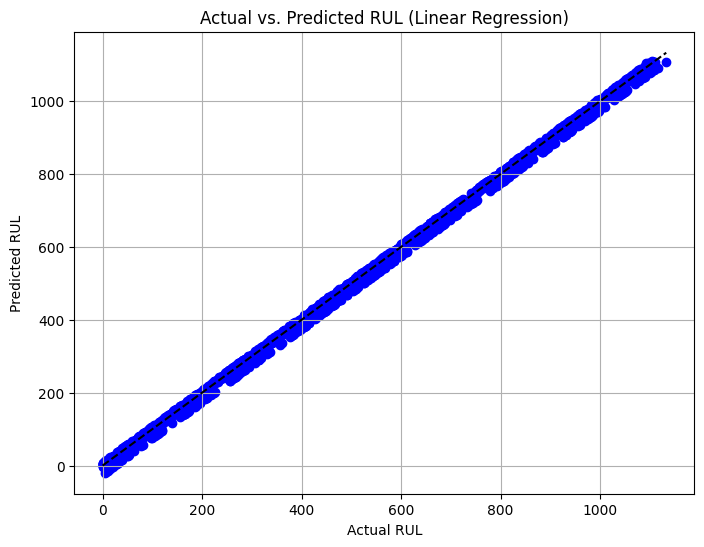

In [ ]:
# Visualize actual vs. predicted RUL for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, linear_preds, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs. Predicted RUL (Linear Regression)')
plt.grid(True)
plt.show()

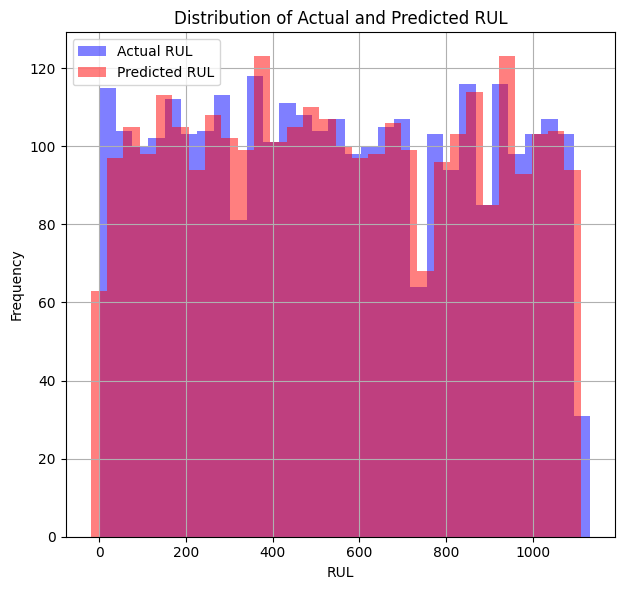

In [ ]:
# Visualize actual vs. predicted RUL and their distribution using histograms
plt.figure(figsize=(12, 6))


# Plot distribution of actual and predicted RUL
plt.subplot(1, 2, 2)
plt.hist(y_test, bins=30, alpha=0.5, color='blue', label='Actual RUL')
plt.hist(linear_preds, bins=30, alpha=0.5, color='red', label='Predicted RUL')
plt.xlabel('RUL')
plt.ylabel('Frequency')
plt.title('Distribution of Actual and Predicted RUL')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

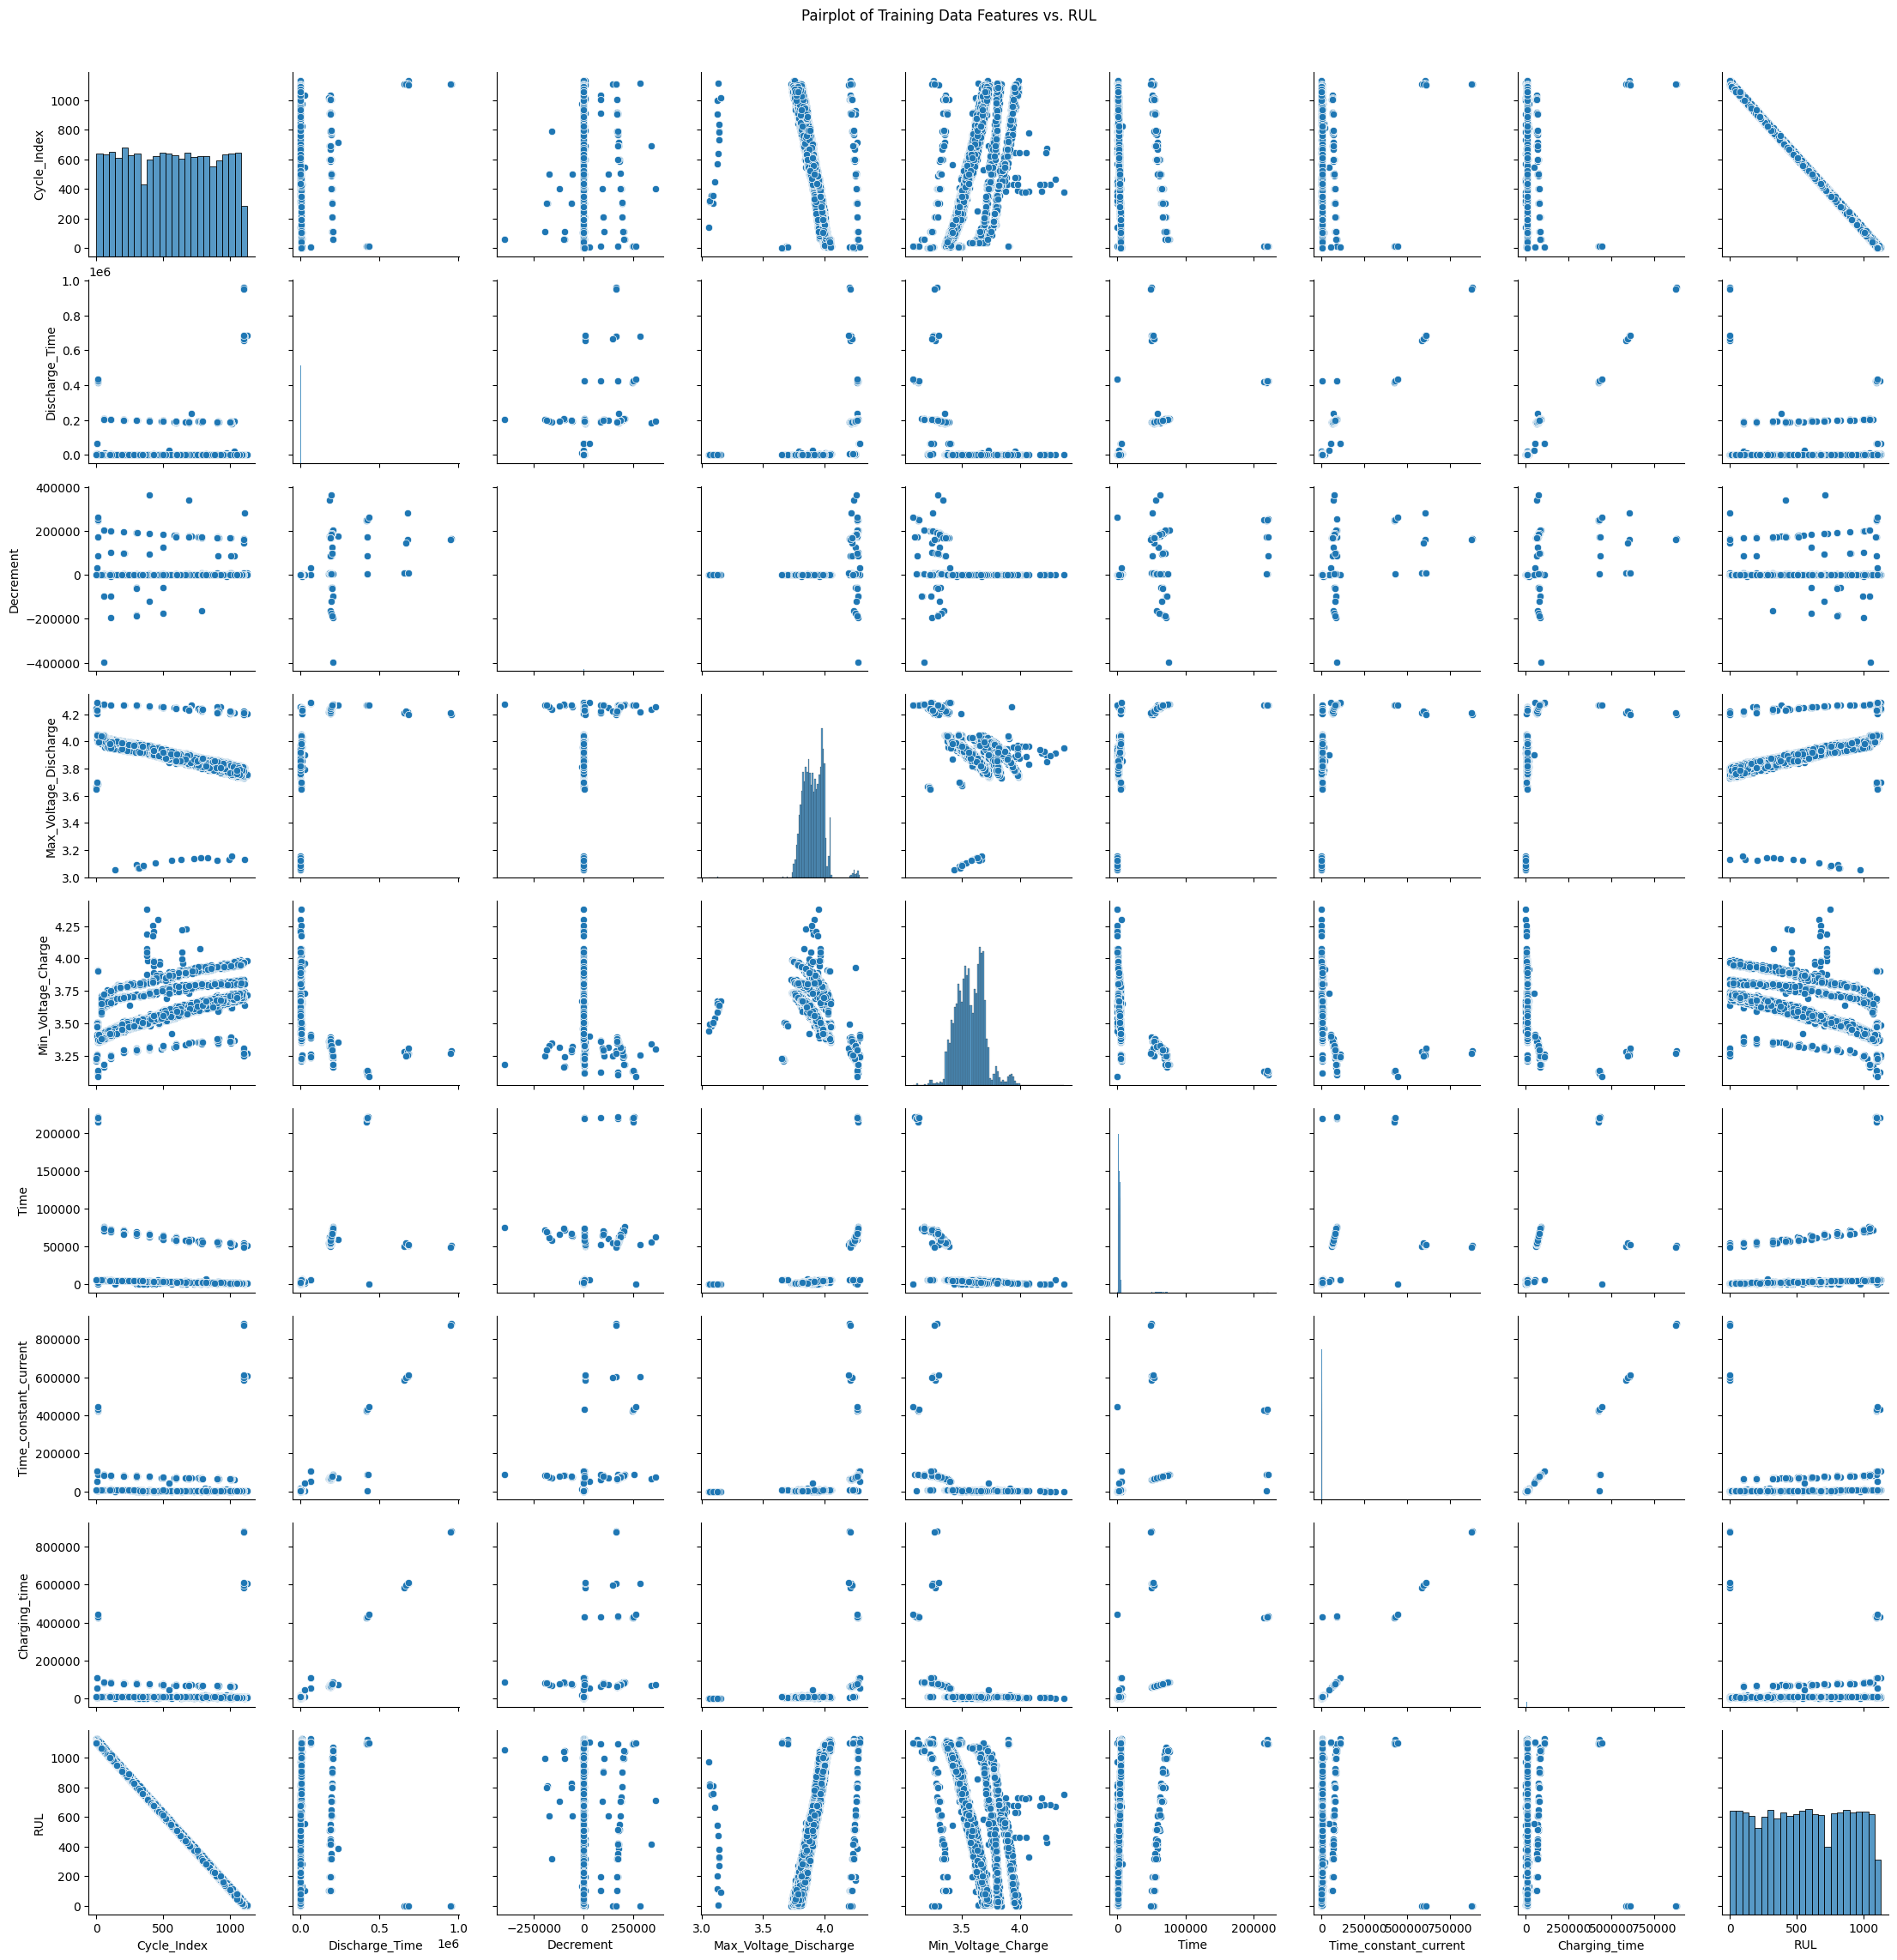

In [ ]:
# Create pairplot for training data features vs. RUL
train_data_pairplot = pd.concat([X_train, y_train], axis=1)
sns.pairplot(train_data_pairplot)
plt.suptitle('Pairplot of Training Data Features vs. RUL', y=1.02)
plt.show()

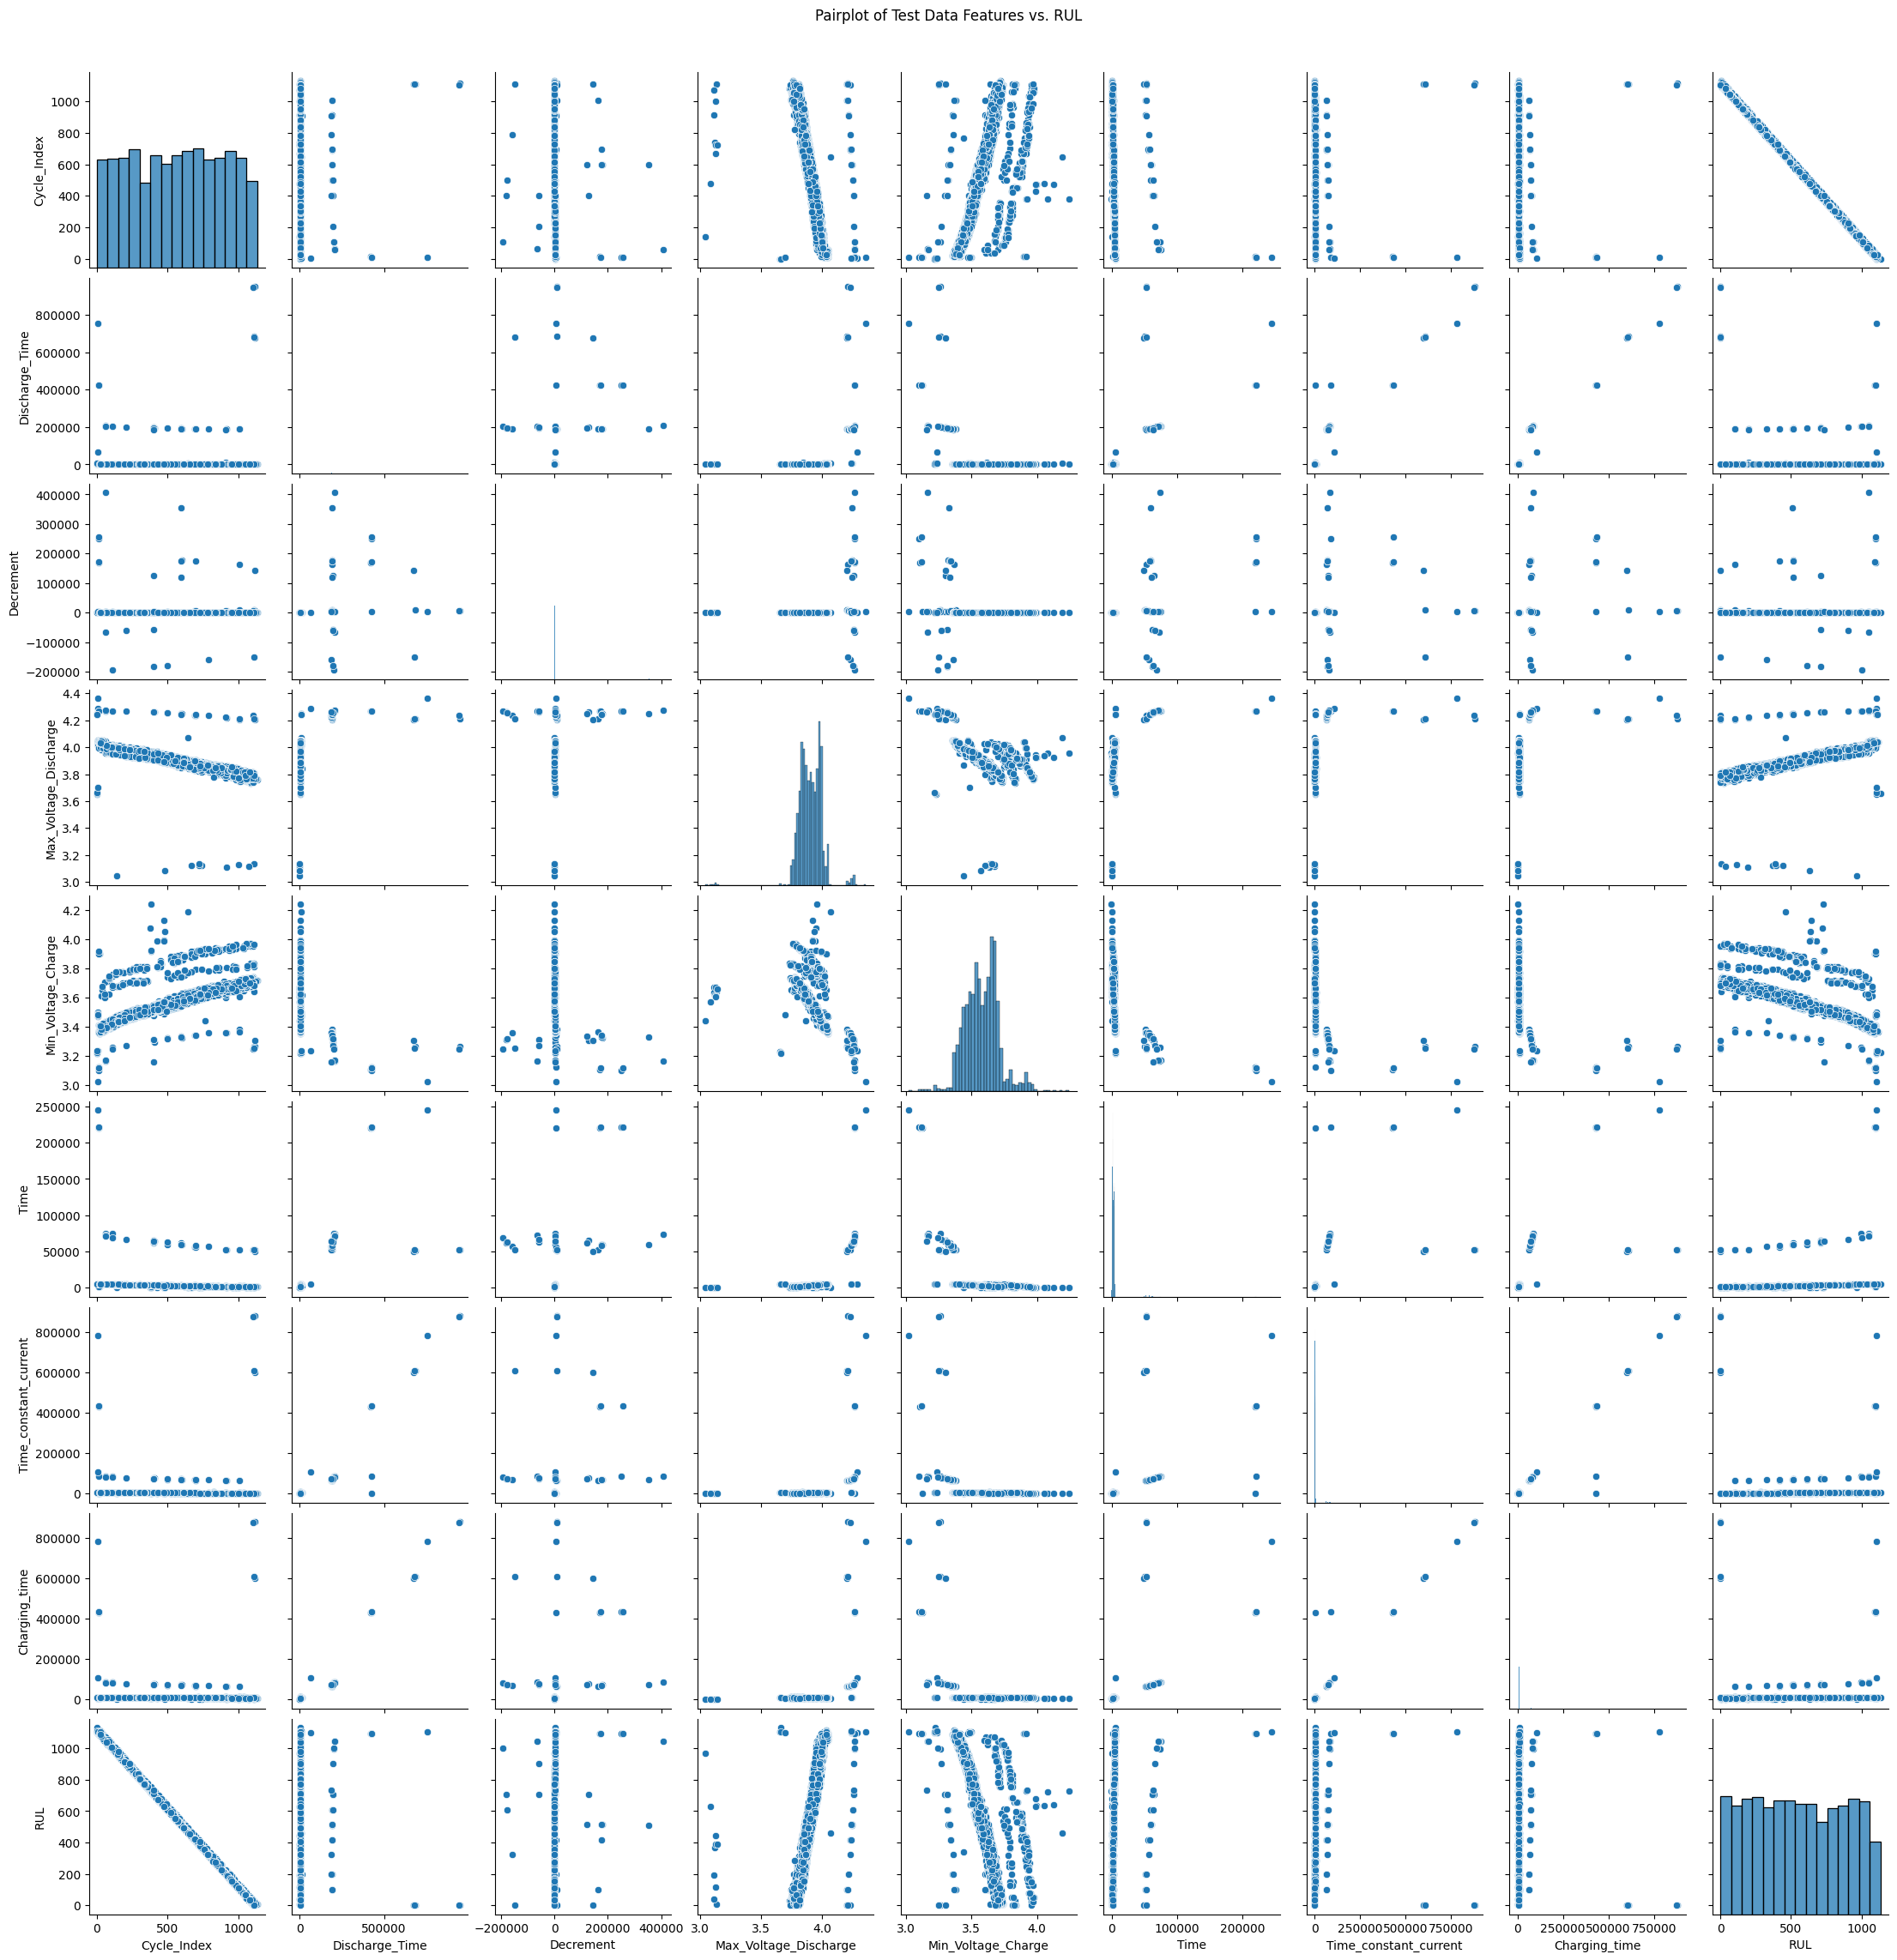

In [ ]:
# Create pairplot for test data features vs. RUL
test_data_pairplot = pd.concat([X_test, y_test], axis=1)
sns.pairplot(test_data_pairplot)
plt.suptitle('Pairplot of Test Data Features vs. RUL', y=1.02)
plt.show()

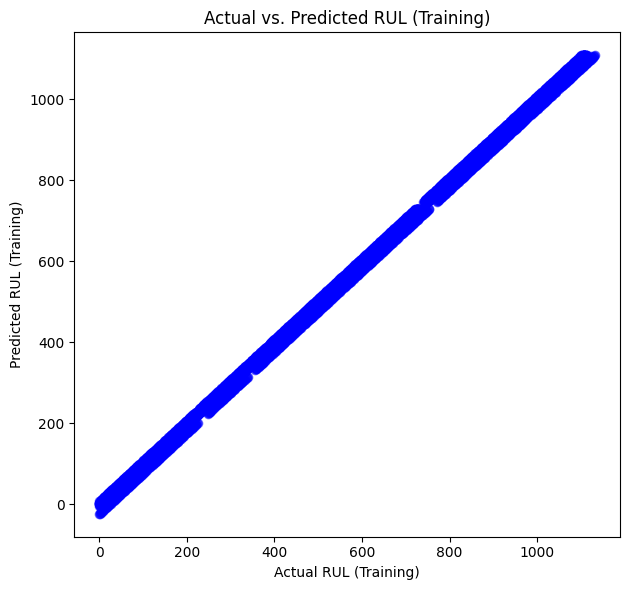

In [ ]:
# Visualize training data with respect to RUL
plt.figure(figsize=(12, 6))

# Scatter plot for training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5, color='blue')
plt.xlabel('Actual RUL (Training)')
plt.ylabel('Predicted RUL (Training)')
plt.title('Actual vs. Predicted RUL (Training)')

plt.tight_layout()
plt.show()

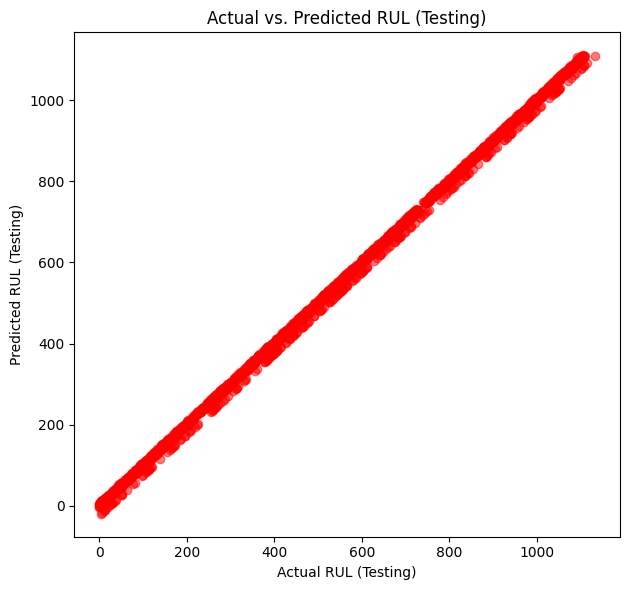

In [ ]:
# Visualize testing data with respect to RUL
plt.figure(figsize=(12, 6))
# Scatter plot for test data
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred, color='red', alpha=0.5)
plt.xlabel('Actual RUL (Testing)')
plt.ylabel('Predicted RUL (Testing)')
plt.title('Actual vs. Predicted RUL (Testing)')

plt.tight_layout()
plt.show()

In [ ]:
# Print evaluation metrics for training data
print("Evaluation Metrics for Linear Regression:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(f"Training Time: {training_time} seconds")
print(f"Prediction Time: {prediction_time} seconds")

Evaluation Metrics for Linear Regression:
MSE: 54.54310491948241
MAE: 4.644128441792308
RMSE: 7.385330386616594
R2: 0.9994734490216359
Training Time: 0.026845216751098633 seconds
Prediction Time: 0.009732246398925781 seconds


In [ ]:
# Print evaluation metrics for testing dataa
print("Evaluation Metrics for Linear Regression:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(f"Training Time: {training_time} seconds")
print(f"Prediction Time: {prediction_time} seconds")

Evaluation Metrics for Linear Regression:
MSE: 54.54310491948241
MAE: 4.644128441792308
RMSE: 7.385330386616594
R2: 0.9994734490216359
Training Time: 0.026845216751098633 seconds
Prediction Time: 0.009732246398925781 seconds


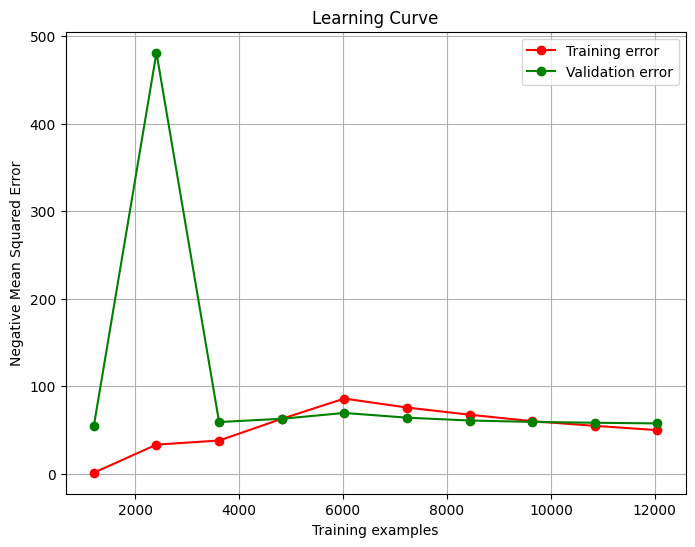

In [ ]:
from sklearn.model_selection import learning_curve

# Define function to plot learning curve
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10),
                                                            scoring='neg_mean_squared_error', cv=5)
    train_scores_mean = -np.mean(train_scores, axis=1)
    val_scores_mean = -np.mean(val_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training error')
    plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Validation error')
    plt.xlabel('Training examples')
    plt.ylabel('Negative Mean Squared Error')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot learning curve for Linear Regression
plot_learning_curve(linear_model, X, y)

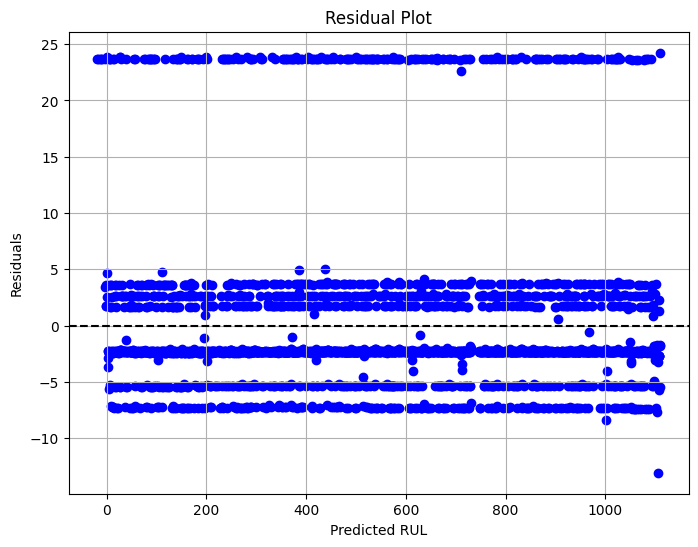

In [ ]:
# Calculate residuals
residuals = y_test - linear_preds

# Plot residual plot
plt.figure(figsize=(8, 6))
plt.scatter(linear_preds, residuals, color='blue')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted RUL')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

In [ ]:
def get_user_input():
  Cycle_Index = float(input("Enter Cycle_Index: "))
  Discharge_Time  = float(input("Enter Discharge Time: "))
  Decrement =float(input("Enter Decrement 3.6-3.4V: "))
  Max_Voltage_Discharge =float(input("Enter Max. Voltage Dischar. (V)"))
  Min_Voltage_Charge =float(input("Enter Min. Voltage Charg. (V): "))
  Time =float(input("Enter Time at 4.15V (s): "))
  Time_constant_current=float(input("Enter Time constant current (s): "))
  Charging_time =float(input("Enter Charging time (s)"))
  return [Cycle_Index, Discharge_Time, Decrement, Max_Voltage_Discharge , Min_Voltage_Charge, Time, Time_constant_current, Charging_time]

def predict_rul(user_features, regressor):
  #convert user input into a numpy array for prediction
  user_features_array=np.array([user_features])
  #Predict RUL using the trained model
  predicted_rul=regressor.predict(user_features_array)
  return predicted_rul[0]

#Get user input for features
user_features = get_user_input()

#Predict RUL based on user input
predicted_rul=predict_rul(user_features, linear_model)

print("\nThe Predicted Remaining Useful Life (RUL:) of your battery is", predicted_rul)
print("This estimate is a rough approximation and actual RUL can vary based on various factors including usage patterns, temperature, and charging habits.")



Enter Cycle_Index: 10
Enter Discharge Time: 20
Enter Decrement 3.6-3.4V: 30
Enter Max. Voltage Dischar. (V)40
Enter Min. Voltage Charg. (V): 50
Enter Time at 4.15V (s): 60
Enter Time constant current (s): 70
Enter Charging time (s)80

The Predicted Remaining Useful Life (RUL:) of your battery is 1137.3598034664976
This estimate is a rough approximation and actual RUL can vary based on various factors including usage patterns, temperature, and charging habits.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
